In [1281]:
import pandas as pd
import numpy as np

In [1282]:
df=pd.read_csv("t20i_info.csv")

In [1283]:
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground


In [1284]:
df.isnull().sum()

Unnamed: 0             0
match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [1285]:
df.shape

(63888, 9)

In [1286]:
# Cricbuzz, Cricket Line Guru, Tv Screen -> Projected Score / Predicted Score

batting team,
bowling team,
city,
current score,
balls left,
wicket left,
current run rate,
last five/six->powerplay,

In [1287]:
df[df['city'].isnull()]['venue'][0].split(" ")[0]

'Melbourne'

In [1288]:
df['city'] = df['city'].fillna(df['venue'].apply(lambda x: x.split(' ')[0]))

In [1289]:
df.tail()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium
63887,125,964,Sri Lanka,Australia,19.7,1,0,Colombo,R Premadasa Stadium


In [1290]:
df.isnull().sum()

Unnamed: 0          0
match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [1291]:
df['city'].value_counts()

city
Colombo          4086
Mirpur           3420
Johannesburg     3331
Dubai            2969
Auckland         2532
                 ... 
Victoria          123
Potchefstroom     122
Dharamsala        122
Ahmedabad         121
Carrara            64
Name: count, Length: 86, dtype: int64

In [1292]:
eligible_cites = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [1293]:
eligible_cites

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban',
 'St Lucia',
 'Wellington',
 'Lauderhill',
 'Hamilton',
 'Centurion',
 'Manchester',
 'Abu Dhabi',
 'Mumbai',
 'Nottingham',
 'Southampton',
 'Mount Maunganui',
 'Chittagong',
 'Kolkata',
 'Lahore',
 'Delhi',
 'Nagpur',
 'Chandigarh',
 'Adelaide',
 'Bangalore',
 'St Kitts',
 'Cardiff',
 'Christchurch',
 'Trinidad']

In [1294]:
df = df[df['city'].isin(eligible_cites)]

In [1295]:
df.shape

(50501, 9)

In [1296]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [1297]:
df['current_score'] = df.groupby('match_id')['runs'].cumsum()


In [1298]:
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3


In [1299]:
df['over'] = df['ball'].apply(lambda x : str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x : str(x).split(".")[1])

In [1300]:
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5


In [1301]:
df['ball_bowled'] = (df['over'].astype(int)*6 + df['ball_no'].astype(int))

In [1302]:
df.tail()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120
63887,125,964,Sri Lanka,Australia,19.7,1,0,Colombo,R Premadasa Stadium,128,19,7,121


In [1303]:
df['balls_left'] = 120 - df['ball_bowled']

In [1304]:
df.tail()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0
63887,125,964,Sri Lanka,Australia,19.7,1,0,Colombo,R Premadasa Stadium,128,19,7,121,-1


In [1305]:
df['balls_left'] = df['balls_left'].apply(lambda x:0 if x<0 else x)

In [1306]:
df.tail()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0
63887,125,964,Sri Lanka,Australia,19.7,1,0,Colombo,R Premadasa Stadium,128,19,7,121,0


In [1307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50501 entries, 0 to 63887
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50501 non-null  int64  
 1   match_id          50501 non-null  int64  
 2   batting_team      50501 non-null  object 
 3   bowling_team      50501 non-null  object 
 4   ball              50501 non-null  float64
 5   runs              50501 non-null  int64  
 6   player_dismissed  50501 non-null  object 
 7   city              50501 non-null  object 
 8   venue             50501 non-null  object 
 9   current_score     50501 non-null  int64  
 10  over              50501 non-null  object 
 11  ball_no           50501 non-null  object 
 12  ball_bowled       50501 non-null  int64  
 13  balls_left        50501 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 5.8+ MB


In [1308]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:1 if x!='0' else '0')

In [1309]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118,2
63885,123,964,Sri Lanka,Australia,19.5,0,1,Colombo,R Premadasa Stadium,125,19,5,119,1
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120,0


In [1310]:
df['player_dismissed'] = df['player_dismissed'].astype(int)

In [1311]:
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].cumsum()

In [1312]:
df['wicket_left'] = 10 - df['player_dismissed']

In [1313]:
df.tail()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left,wicket_left
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,1
63887,125,964,Sri Lanka,Australia,19.7,1,9,Colombo,R Premadasa Stadium,128,19,7,121,0,1


In [1314]:
df['current_run_rate'] = (df['current_score']*6) / df['ball_bowled']

In [1315]:
df.tail()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left,wicket_left,current_run_rate
63883,121,964,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2,6.410256
63884,122,964,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2,6.355932
63885,123,964,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1,6.302521
63886,124,964,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,1,6.350000
63887,125,964,Sri Lanka,Australia,19.7,1,9,Colombo,R Premadasa Stadium,128,19,7,121,0,1,6.347107


In [1316]:
groups = df.groupby('match_id')
match_ids = df['match_id'].unique()
last_five = []

for id in match_ids:
    group = groups.get_group(id)
    last_five_runs = group['runs'].rolling(window=30).sum()
    last_five.extend(last_five_runs.values.tolist())


In [1317]:
df['last_five'] = last_five

In [1318]:
last_five

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 43.0,
 44.0,
 45.0,
 44.0,
 42.0,
 43.0,
 41.0,
 41.0,
 41.0,
 42.0,
 42.0,
 39.0,
 38.0,
 39.0,
 38.0,
 39.0,
 40.0,
 37.0,
 41.0,
 42.0,
 42.0,
 44.0,
 44.0,
 40.0,
 39.0,
 37.0,
 35.0,
 31.0,
 27.0,
 26.0,
 31.0,
 31.0,
 30.0,
 31.0,
 31.0,
 32.0,
 31.0,
 31.0,
 36.0,
 37.0,
 37.0,
 37.0,
 37.0,
 36.0,
 36.0,
 36.0,
 36.0,
 35.0,
 32.0,
 32.0,
 31.0,
 29.0,
 29.0,
 31.0,
 32.0,
 32.0,
 32.0,
 33.0,
 36.0,
 37.0,
 37.0,
 39.0,
 41.0,
 40.0,
 41.0,
 41.0,
 42.0,
 44.0,
 39.0,
 43.0,
 45.0,
 48.0,
 48.0,
 48.0,
 49.0,
 49.0,
 49.0,
 51.0,
 51.0,
 51.0,
 52.0,
 52.0,
 53.0,
 53.0,
 53.0,
 54.0,
 53.0,
 52.0,
 50.0,
 53.0,
 47.0,
 46.0,
 45.0,
 46.0,
 47.0,
 49.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [1319]:
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left,wicket_left,current_run_rate,last_five
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.0,NaN
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.0,NaN
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.0,NaN
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.5,NaN
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.6,NaN


In [1320]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df, on='match_id')

In [1321]:
final_df

,match_id,runs_x,Unnamed: 0,batting_team,bowling_team,ball,runs_y,player_dismissed,city,venue,current_score,over,ball_no,ball_bowled,balls_left,wicket_left,current_run_rate,last_five
0,2,168,0,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.000000,NaN
1,2,168,1,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.000000,NaN
2,2,168,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.000000,NaN
3,2,168,3,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.500000,NaN
4,2,168,4,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50496,964,128,121,Sri Lanka,Australia,19.3,1,8,Colombo,R Premadasa Stadium,125,19,3,117,3,2,6.410256,32.0
50497,964,128,122,Sri Lanka,Australia,19.4,0,8,Colombo,R Premadasa Stadium,125,19,4,118,2,2,6.355932,32.0
50498,964,128,123,Sri Lanka,Australia,19.5,0,9,Colombo,R Premadasa Stadium,125,19,5,119,1,1,6.302521,32.0
50499,964,128,124,Sri Lanka,Australia,19.6,2,9,Colombo,R Premadasa Stadium,127,19,6,120,0,1,6.350000,33.0


In [1322]:
final_df.columns

Index(['match_id', 'runs_x', 'Unnamed: 0', 'batting_team', 'bowling_team',
       'ball', 'runs_y', 'player_dismissed', 'city', 'venue', 'current_score',
       'over', 'ball_no', 'ball_bowled', 'balls_left', 'wicket_left',
       'current_run_rate', 'last_five'],
      dtype='object')

In [1323]:
final_df = final_df[['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left', 'wicket_left',
       'current_run_rate', 'last_five', 'runs_x']]

In [1324]:
final_df.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10944\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [1325]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,current_run_rate,last_five,runs_x
29,Australia,Sri Lanka,Melbourne,43,90,10,8.600000,43.0,168
30,Australia,Sri Lanka,Melbourne,44,89,10,8.516129,44.0,168
31,Australia,Sri Lanka,Melbourne,45,88,10,8.437500,45.0,168
32,Australia,Sri Lanka,Melbourne,45,87,10,8.181818,44.0,168
33,Australia,Sri Lanka,Melbourne,45,86,10,7.941176,42.0,168
...,...,...,...,...,...,...,...,...,...
50496,Sri Lanka,Australia,Colombo,125,3,2,6.410256,32.0,128
50497,Sri Lanka,Australia,Colombo,125,2,2,6.355932,32.0,128
50498,Sri Lanka,Australia,Colombo,125,1,1,6.302521,32.0,128
50499,Sri Lanka,Australia,Colombo,127,0,1,6.350000,33.0,128


In [1326]:
final_df.isnull().sum()

batting_team        0
bowling_team        0
city                0
current_score       0
balls_left          0
wicket_left         0
current_run_rate    0
last_five           0
runs_x              0
dtype: int64

In [1327]:
final_df.shape

(38477, 9)

In [1328]:
final_df = final_df.sample(final_df.shape[0])

In [1329]:
final_df.shape

(38477, 9)

In [1330]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']

In [1331]:
from sklearn.model_selection import train_test_split

In [1332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=34)

In [1333]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,current_run_rate,last_five
17262,India,England,Durban,155,19,7,9.207921,45.0
48868,Afghanistan,West Indies,Nagpur,38,75,8,5.066667,24.0
42516,England,New Zealand,Manchester,78,69,8,9.176471,48.0
5471,Sri Lanka,India,Mumbai,117,6,3,6.157895,25.0
45594,New Zealand,Sri Lanka,Mount Maunganui,58,85,10,9.942857,50.0
...,...,...,...,...,...,...,...,...
30967,England,Pakistan,Dubai,130,16,5,7.500000,34.0
2970,Bangladesh,Sri Lanka,Colombo,152,18,6,8.941176,34.0
4346,England,India,Manchester,125,21,4,7.575758,27.0
13615,Pakistan,New Zealand,Auckland,43,64,5,4.607143,23.0


In [1334]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [1335]:
transformer = ColumnTransformer([
    ('transformer', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

In [1336]:
pipe = Pipeline(steps=[
    ('step1', transformer),
    ('step2', StandardScaler()),
    ('step3', LinearRegression())
])

In [ ]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


In [1341]:
r2 = r2_score(y_test, y_pred)
print("R² Score:", round(r2, 2))


R² Score: 0.71


In [1339]:
mean_absolute_error(y_test, y_pred)
print("MAE     :", mean_absolute_error(y_test, y_pred))

MAE     : 12.835402648297292


In [1340]:
import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))

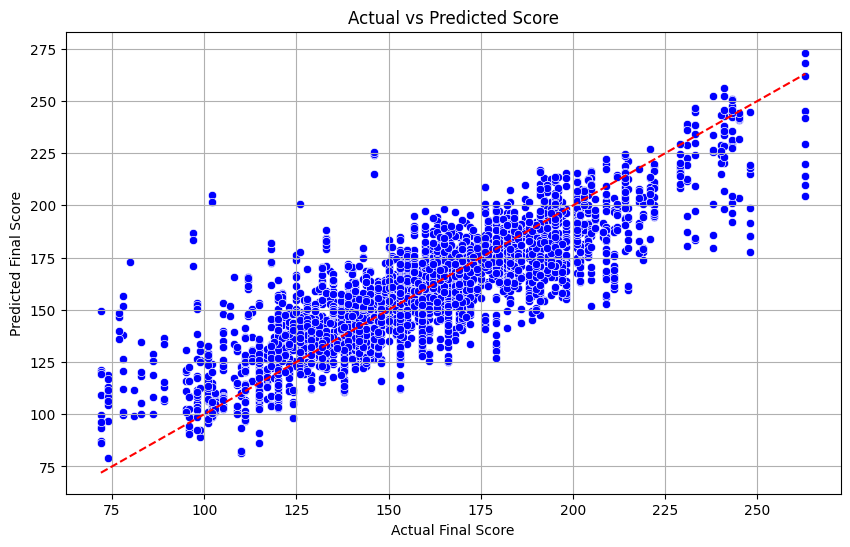

In [1346]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Score")
plt.grid(True)
plt.show()


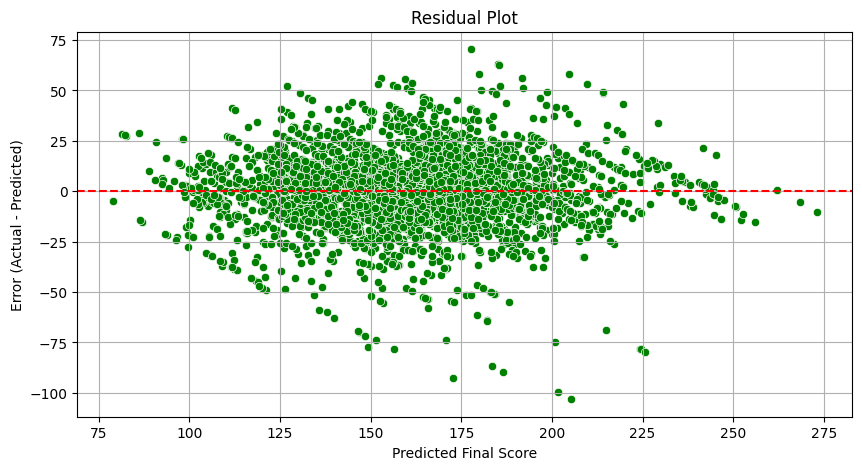

In [1345]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted Final Score")
plt.ylabel("Error (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


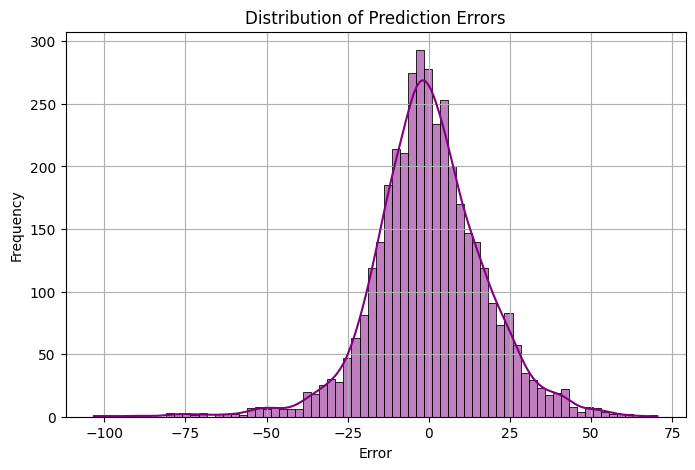

In [1347]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
